In [27]:
import pandas as pd 
import numpy as np  
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sb 
import plotly.subplots as sp
import plotly.graph_objs as go 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('Dataset-Mental-Disorders.csv',index_col='Patient Number')
df.head(2)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, Patiant-01 to Patiant-120
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 

In [ ]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Sadness: ['Usually' 'Sometimes' 'Seldom' 'Most-Often']
Euphoric: ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Exhausted: ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Sleep dissorder: ['Sometimes' 'Most-Often' 'Usually' 'Seldom']
Mood Swing: ['YES' 'NO']
Suicidal thoughts: ['YES ' 'YES' 'NO']
Anorxia: ['NO' 'YES']
Authority Respect: ['NO' 'YES']
Try-Explanation: ['YES' 'NO']
Aggressive Response: ['NO' 'YES']
Ignore & Move-On: ['NO' 'YES']
Nervous Break-down: ['YES' 'NO']
Admit Mistakes: ['YES' 'NO']
Overthinking: ['YES' 'NO']
Sexual Activity: ['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10']
Concentration: ['3 From 10' '2 From 10' '5 From 10' '4 From 10' '7 From 10' '6 From 10'
 '1 From 10' '8 From 10']
Optimisim: ['4 From 10' '5 From 10' '7 From 10' '2 From 10' '6 From 10' '9 From 10'
 '3 From 10' '8 From 10' '1 From 10']
Expert Diagnose: ['Bipolar Type-2' 'Depression' 'Bipolar Type-1' 'Normal']


In [ ]:
df.loc[df[df['Suicidal thoughts']=='YES ']['Suicidal thoughts'].index[0],'Suicidal thoughts']='YES'

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_30004\1254054704.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


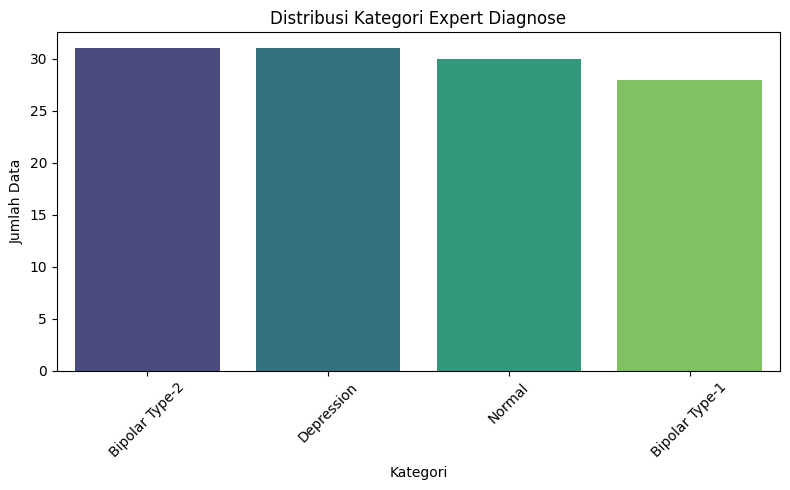

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

counts = df['Expert Diagnose'].value_counts()

sns.barplot(x=counts.index, y=counts.values, palette="viridis")

plt.title('Distribusi Kategori Expert Diagnose')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
manual_encoders = {
    "Sadness": {
        "Most-Often": 0,
        "Usually": 1,
        "Sometimes": 2,
        "Seldom": 3
    },
    "Euphoric": {
        "Most-Often": 0,
        "Usually": 1,
        "Sometimes": 2,
        "Seldom": 3
    },
    "Exhausted": {
        "Most-Often": 0,
        "Usually": 1,
        "Sometimes": 2,
        "Seldom": 3
    },
    "Sleep dissorder": {
        "Most-Often": 0,
        "Usually": 1,
        "Sometimes": 2,
        "Seldom": 3
    },
    "Mood Swing": {
        "NO": 0,
        "YES": 1
    },
    "Suicidal thoughts": {
        "NO": 0,
        "YES": 1,
        "YES ": 1 
    },
    "Anorxia": {
        "NO": 0,
        "YES": 1
    },
    "Authority Respect": {
        "NO": 0,
        "YES": 1
    },
    "Try-Explanation": {
        "NO": 0,
        "YES": 1
    },
    "Aggressive Response": {
        "NO": 0,
        "YES": 1
    },
    "Ignore & Move-On": {
        "NO": 0,
        "YES": 1
    },
    "Nervous Break-down": {
        "NO": 0,
        "YES": 1
    },
    "Admit Mistakes": {
        "NO": 0,
        "YES": 1
    },
    "Overthinking": {
        "NO": 0,
        "YES": 1
    },
    "Sexual Activity": {
        "1 From 10": 0,
        "2 From 10": 1,
        "3 From 10": 2,
        "4 From 10": 3,
        "5 From 10": 4,
        "6 From 10": 5,
        "7 From 10": 6,
        "8 From 10": 7,
        "9 From 10": 8
    },
    "Concentration": {
        "1 From 10": 0,
        "2 From 10": 1,
        "3 From 10": 2,
        "4 From 10": 3,
        "5 From 10": 4,
        "6 From 10": 5,
        "7 From 10": 6,
        "8 From 10": 7
    },
    "Optimisim": {
        "1 From 10": 0,
        "2 From 10": 1,
        "3 From 10": 2,
        "4 From 10": 3,
        "5 From 10": 4,
        "6 From 10": 5,
        "7 From 10": 6,
        "8 From 10": 7,
        "9 From 10": 8
    },
    "Expert Diagnose": {
        "Normal": 0,
        "Depression": 1,
        "Bipolar Type-1": 2,
        "Bipolar Type-2": 3
    }
}

manual_decoders = {
    feature: {v: k for k, v in mapping.items()}
    for feature, mapping in manual_encoders.items()
}



In [ ]:
input_data = {
    "Sadness": "Usually",
    "Euphoric": "Seldom",
    "Exhausted": "Sometimes",
    "Sleep dissorder": "Usually",
    "Mood Swing": "YES",
    "Suicidal thoughts": "NO",
    "Anorxia": "NO",
    "Authority Respect": "YES",
    "Try-Explanation": "YES",
    "Aggressive Response": "NO",
    "Ignore & Move-On": "YES",
    "Nervous Break-down": "NO",
    "Admit Mistakes": "YES",
    "Overthinking": "YES",
    "Sexual Activity": "3 From 10",
    "Concentration": "5 From 10",
    "Optimisim": "7 From 10"
}

def manual_encode_df(df, manual_encoders):
    df_encoded = df.copy()
    for col, mapping in manual_encoders.items():
        if col in df_encoded.columns:
            df_encoded[col] = df_encoded[col].map(mapping)
            if df_encoded[col].isnull().any():
                missing = df_encoded[col][df_encoded[col].isnull()].unique()
                raise ValueError(f"Found unmapped values in column '{col}': {missing}")
        else:
            print(f"Warning: Column '{col}' tidak ada di dataframe.")
    return df_encoded

df_encoded = manual_encode_df(df, manual_encoders)

In [36]:
df_encoded

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,1,3,2,2,1,1,0,0,1,0,0,1,1,1,2,2,3,3
Patiant-02,1,3,1,2,0,1,0,0,0,0,0,0,0,0,3,1,4,1
Patiant-03,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,2
Patiant-04,1,3,1,0,1,1,1,0,1,0,0,0,0,0,2,1,1,3
Patiant-05,1,1,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patiant-116,0,3,1,2,0,1,0,0,1,0,1,0,0,1,1,4,2,1
Patiant-117,2,2,2,3,1,0,0,0,0,1,0,0,0,1,5,6,7,2
Patiant-118,1,2,1,2,1,0,1,1,0,0,0,1,0,1,0,4,2,3


In [ ]:
X = df_encoded.drop('Expert Diagnose', axis=1)
y = df_encoded['Expert Diagnose']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
importance_df_encoded = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df_encoded)

                Feature  Importance
4            Mood Swing    0.269149
16            Optimisim    0.124923
14      Sexual Activity    0.100385
0               Sadness    0.091065
1              Euphoric    0.062065
5     Suicidal thoughts    0.056949
15        Concentration    0.053641
2             Exhausted    0.046259
3       Sleep dissorder    0.037409
7     Authority Respect    0.029345
9   Aggressive Response    0.026445
11   Nervous Break-down    0.025655
6               Anorxia    0.018021
13         Overthinking    0.017620
10     Ignore & Move-On    0.017503
12       Admit Mistakes    0.014060
8       Try-Explanation    0.009507


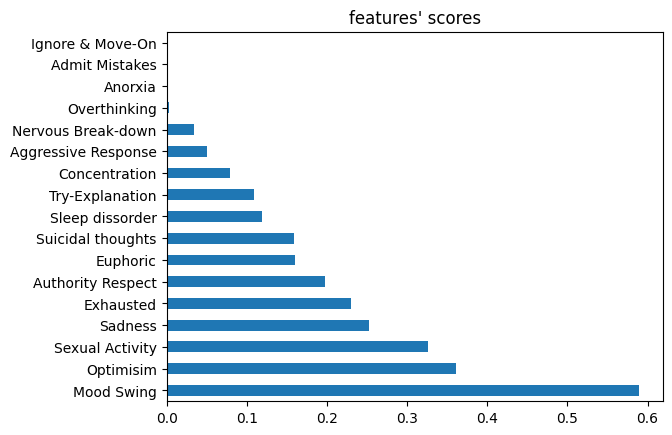

Sadness                0.253027
Euphoric               0.159931
Exhausted              0.229913
Sleep dissorder        0.118475
Mood Swing             0.589290
Suicidal thoughts      0.159436
Anorxia                0.000000
Authority Respect      0.197063
Try-Explanation        0.109300
Aggressive Response    0.050134
Ignore & Move-On       0.000000
Nervous Break-down     0.033773
Admit Mistakes         0.000000
Overthinking           0.002604
Sexual Activity        0.326618
Concentration          0.079577
Optimisim              0.361017
dtype: float64


In [39]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt
import pandas as pd

X = df_encoded[df_encoded.columns[:-1]]
y = df_encoded[df_encoded.columns[-1]]

mi_scores = mutual_info_classif(X, y, random_state=42)

feature_selection = SelectKBest(score_func=lambda X, y: mi_scores)
feature_selection.fit(X, y)

features_scores = pd.Series(mi_scores, index=X.columns)
features_scores.nlargest(18).plot(kind='barh', title="features' scores")
plt.show()

print(features_scores)


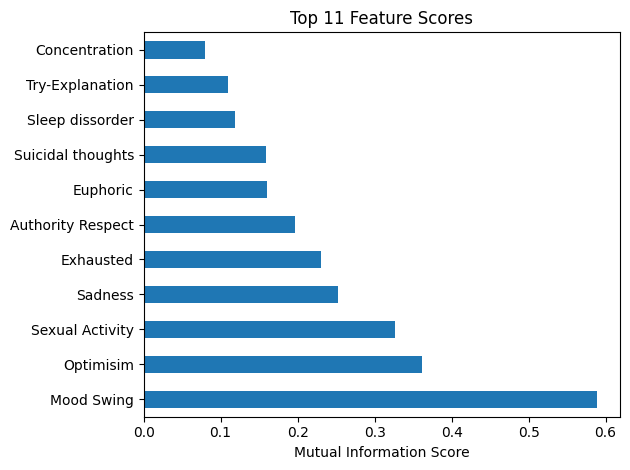

Top 11 features:
 Mood Swing           0.589290
Optimisim            0.361017
Sexual Activity      0.326618
Sadness              0.253027
Exhausted            0.229913
Authority Respect    0.197063
Euphoric             0.159931
Suicidal thoughts    0.159436
Sleep dissorder      0.118475
Try-Explanation      0.109300
Concentration        0.079577
dtype: float64


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

X = df_encoded[df_encoded.columns[:-1]]
y = df_encoded[df_encoded.columns[-1]]

mi_scores = mutual_info_classif(X, y, random_state=42)

features_scores = pd.Series(mi_scores, index=X.columns)
top_11_features = features_scores.nlargest(11)

top_11_features.plot(kind='barh', title="Top 11 Feature Scores")
plt.xlabel("Mutual Information Score")
plt.tight_layout()
plt.show()

print("Top 11 features:\n", top_11_features)

X_top11 = X[top_11_features.index]


In [ ]:
X = df_encoded.drop(columns=[df_encoded.columns[-1]])  
y = df_encoded[df_encoded.columns[-1]]                  

x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=2,
    shuffle=True,
    stratify=y  
)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

from collections import Counter
print("Distribusi sebelum oversampling:", Counter(y_train))
print("Distribusi sesudah oversampling :", Counter(y_train_resampled))


Distribusi sebelum oversampling: Counter({3: 22, 1: 22, 0: 21, 2: 19})
Distribusi sesudah oversampling : Counter({3: 22, 2: 22, 0: 22, 1: 22})


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [44]:
# --- Normalisasi fitur ---
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

In [45]:
input_dim = x_train_scaled.shape[1]
output_dim = len(y_train.unique())

model = Sequential([
    Dense(128, input_dim=input_dim, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(output_dim, activation='softmax')
])

d:\DBS\Project Capstone\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [47]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [48]:
# --- Training ---
history = model.fit(
    x_train_scaled, y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.1645 - loss: 1.4390 - val_accuracy: 0.3889 - val_loss: 1.3521
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3212 - loss: 1.3440 - val_accuracy: 0.4444 - val_loss: 1.3008
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4285 - loss: 1.2523 - val_accuracy: 0.5000 - val_loss: 1.2579
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4220 - loss: 1.2666 - val_accuracy: 0.5000 - val_loss: 1.2179
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4330 - loss: 1.2242 - val_accuracy: 0.5000 - val_loss: 1.1797
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6229 - loss: 1.0861 - val_accuracy: 0.5000 - val_loss: 1.1439
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7237 - loss: 0.9672 - val_accuracy: 0.5000 - val_loss: 1.1112
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6144 - loss: 1.0113 - val_accuracy: 0.5000 - val_loss: 1.0807

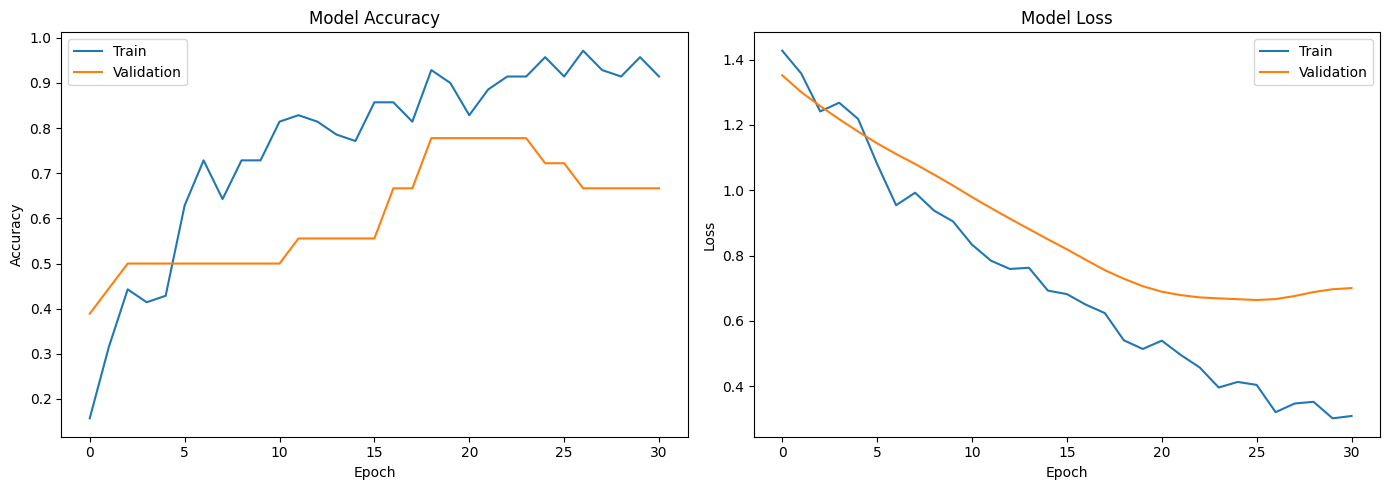

In [49]:
# --- Visualisasi akurasi & loss ---
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# --- Evaluasi pada training set ---
train_loss, train_acc = model.evaluate(x_train_scaled, y_train_resampled, verbose=0)
print(f"\nTraining Set - Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")

# --- Evaluasi pada test set ---
test_loss, test_acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"Test Set     - Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}")


📊 Training Set - Loss: 0.3441, Accuracy: 0.9091
📊 Test Set     - Loss: 0.4362, Accuracy: 0.9167


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

🧾 Classification Report (Test Set):

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.82      1.00      0.90         9
           2       1.00      0.89      0.94         9
           3       0.90      1.00      0.95         9

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.93      0.92      0.92        36



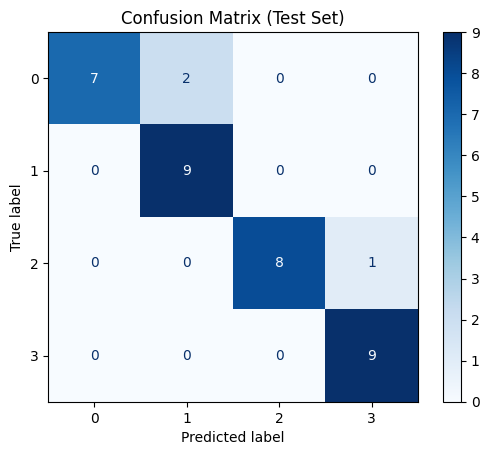

In [ ]:
y_pred = model.predict(x_test_scaled)
y_pred_classes = tf.argmax(y_pred, axis=1)

print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_pred_classes))

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()

In [52]:
df_encoded

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,1,3,2,2,1,1,0,0,1,0,0,1,1,1,2,2,3,3
Patiant-02,1,3,1,2,0,1,0,0,0,0,0,0,0,0,3,1,4,1
Patiant-03,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,2
Patiant-04,1,3,1,0,1,1,1,0,1,0,0,0,0,0,2,1,1,3
Patiant-05,1,1,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patiant-116,0,3,1,2,0,1,0,0,1,0,1,0,0,1,1,4,2,1
Patiant-117,2,2,2,3,1,0,0,0,0,1,0,0,0,1,5,6,7,2
Patiant-118,1,2,1,2,1,0,1,1,0,0,0,1,0,1,0,4,2,3


In [53]:
model.save("best_model.keras")


Inferences

In [ ]:
import tensorflow as tf
import numpy as np

label_decoder = {
    0: "Normal",
    1: "Depression",
    2: "Bipolar Type-1",
    3: "Bipolar Type-2"
}

loaded_model = tf.keras.models.load_model("best_model.keras")

pred_probs = loaded_model.predict(x_test_scaled)

# Prediksi kelas sebagai index angka
pred_classes = np.argmax(pred_probs, axis=1)

# Tampilkan prediksi kelas dengan nama dan confidence
for i in range(5):  
    pred_label = label_decoder[pred_classes[i]]
    confidence = pred_probs[i][pred_classes[i]]
    print(f"Sample {i}: Predicted Class = {pred_label}, Confidence = {confidence:.4f}")

# Evaluasi akurasi model
loss, accuracy = loaded_model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Sample 0: Predicted Class = Depression, Confidence = 0.8171
Sample 1: Predicted Class = Normal, Confidence = 0.8684
Sample 2: Predicted Class = Depression, Confidence = 0.4145
Sample 3: Predicted Class = Depression, Confidence = 0.6664
Sample 4: Predicted Class = Bipolar Type-2, Confidence = 0.5778

Test Accuracy: 0.9167


In [ ]:
import numpy as np
import pandas as pd

samples_raw = X.iloc[:20]

samples_scaled = scaler.transform(samples_raw)

pred_probs = loaded_model.predict(samples_scaled)

pred_classes = np.argmax(pred_probs, axis=1)

print("Prediksi 20 sample pertama:")
for i in range(20):
    pred_label = label_decoder[pred_classes[i]]
    confidence = pred_probs[i][pred_classes[i]]
    print(f"Sample {i+1}: Predicted = {pred_label}, Confidence = {confidence:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Prediksi 20 sample pertama:
Sample 1: Predicted = Bipolar Type-2, Confidence = 0.9057
Sample 2: Predicted = Depression, Confidence = 0.6620
Sample 3: Predicted = Bipolar Type-1, Confidence = 0.9371
Sample 4: Predicted = Bipolar Type-2, Confidence = 0.9388
Sample 5: Predicted = Normal, Confidence = 0.6858
Sample 6: Predicted = Depression, Confidence = 0.8301
Sample 7: Predicted = Bipolar Type-1, Confidence = 0.9608
Sample 8: Predicted = Normal, Confidence = 0.6053
Sample 9: Predicted = Bipolar Type-2, Confidence = 0.8518
Sample 10: Predicted = Depression, Confidence = 0.6192
Sample 11: Predicted = Normal, Confidence = 0.9821
Sample 12: Predicted = Bipolar Type-1, Confidence = 0.9256
Sample 13: Predicted = Bipolar Type-2, Confidence = 0.5237
Sample 14: Predicted = Normal, Confidence = 0.8912
Sample 15: Predicted = Depression, Confidence = 0.7086
Sample 16: Predicted = Bipolar Type-1, Confidence = 0.8577
Sample 17: Predicted = Normal, Confidence = 0.8

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("best_model.keras")  
model.export("saved_model/")

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 17), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2095835598864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2095835600400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2095835599440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2095835600592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2095835598096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2095835601168: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
model = tf.keras.models.load_model("best_model_tf.h5", compile=False)

In [ ]:
print(model.input_shape)

(None, 17)


In [ ]:
print(model.inputs)

[<KerasTensor shape=(None, 17), dtype=float32, sparse=False, ragged=False, name=input_layer_1>]


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,820 (42.27 KB)

 Trainable params: 10,820 (42.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('best_model_tf.h5')

# Nilai dummy ini bisa kamu ganti dengan input aktual
input_baru = np.array([[1, 3, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 3]])


input_baru_scaled = scaler.transform(input_baru)
prediksi = model.predict(input_baru_scaled)

predicted_class = np.argmax(prediksi, axis=1)[0]

label_map = {
    0: "Normal",
    1: "Depression",
    2: "Bipolar Type-1",
    3: "Bipolar Type-2"
}

print("Prediksi:", label_map[predicted_class])
print("Probabilitas:", prediksi)


d:\DBS\Project Capstone\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Prediksi: Bipolar Type-2
Probabilitas: [[0.01451429 0.05181452 0.02794567 0.90572554]]


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

joblib.dump(scaler, "scaler.save")

['scaler.save']